# CHAPTER 5: Analog Signals

In [1]:
# Example of frequency domain

import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
fs=1000 #define sampling freq
dur=1 #define duration of time series
t=np.linspace(0,dur,fs*dur) #make time space t, in steps of sampling freq
freq=2 #define a signal freq, here 2Hz
sinW = np.sin(2*np.pi*freq*t) #compute a sine wave
cosW = np.cos(2*np.pi*freq*t) #compute a cosine wave

#plot
ax=plt.subplot(2,1,1)
ax.plot(t,sinW,c='k',lw=4)
ax.set_title('sine')
ax=plt.subplot(2,1,2)
ax.plot(t,cosW,c='k',lw=4)
ax.set_title('cosine')

plt.show()


<Figure size 640x480 with 2 Axes>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


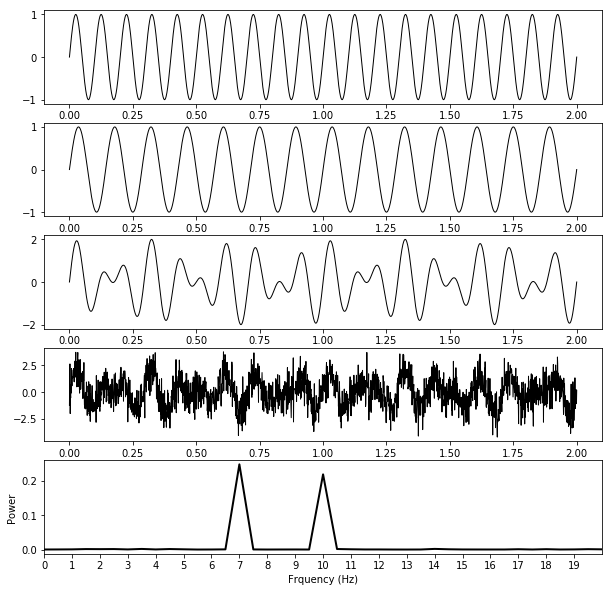

In [2]:
# more complex signal

fig=plt.figure(figsize=(10,10))
dur=2
t=np.linspace(0,dur,fs*dur)
freq=10
signal=np.sin(2*np.pi*freq*t)
ax=plt.subplot(5,1,1)
ax.plot(t,signal,c='k',lw=1)

freq2=7
signal2 = np.sin(2*np.pi*freq2*t)
ax=plt.subplot(5,1,2)
ax.plot(t,signal2,c='k',lw=1)
jointSignal=signal+signal2
ax=plt.subplot(5,1,3)
ax.plot(t,jointSignal,c='k',lw=1)

n=len(t)
noise=np.random.randn(n)
signalAndNoise=jointSignal+noise
ax=plt.subplot(5,1,4)
ax.plot(t,signalAndNoise,c='k',lw=1)


# Do the fourier transform

nyquist = fs/2
fSpaceSignal = np.fft.fft(signalAndNoise)/len(t)
fBase = np.linspace(0,nyquist,np.floor(len(signalAndNoise)/2)+1)
powerPlot = plt.subplot(5,1,5)
halfTheSignal = fSpaceSignal[:len(fBase)]
complexConjugate=np.conj(halfTheSignal)
powe = halfTheSignal*complexConjugate
powerPlot.plot(fBase,powe,c='k',lw=2)
powerPlot.set_xlim([0,20])
powerPlot.set_xticks(range(20))
powerPlot.set_xlabel('Frquency (Hz)')
powerPlot.set_ylabel('Power')

plt.show()

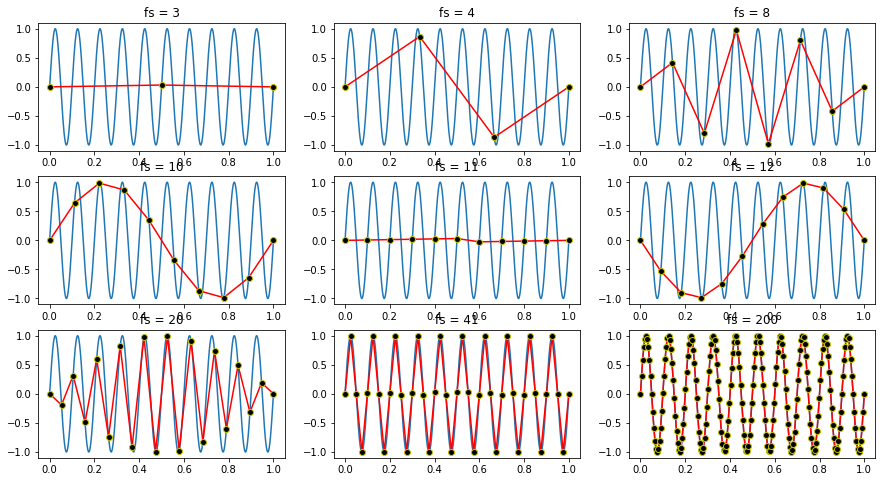

In [3]:
# a demonstration of the perils of aliasing

realSampling=1000
t=np.linspace(0,1,realSampling)
signalFrequency=10
samplingRate=[3,4,8,10,11,12,20,41,200]
signal=np.sin(2*np.pi*signalFrequency*t)
fig=plt.figure(figsize=(15,8))
#print(list(enumerate(samplingRate)))
for ii,sampleRate in enumerate(samplingRate):
    ax=plt.subplot(3,3,ii+1)
    ax.plot(t,signal)
    sampledSignal=np.rint(np.linspace(0,len(t)-1,sampleRate)).astype(int)
    q=ax.plot(t[sampledSignal],signal[sampledSignal],c='r',marker='o',mfc='k',mec='y',markersize=6)
    plt.title('fs = '+str(sampleRate))
    
plt.show()



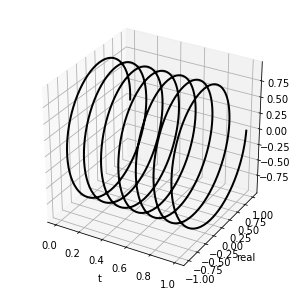

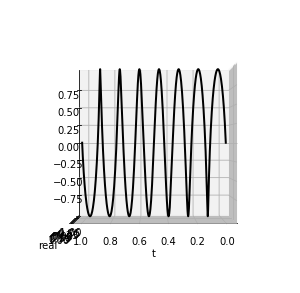

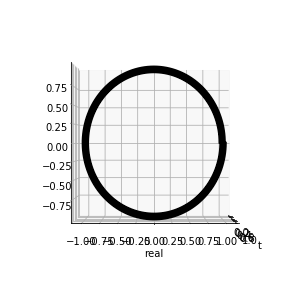

In [4]:
# working through how fourier transform works, esp w.r.t complex numbers

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(5,5))
ax=fig.gca(projection='3d')
trace=np.exp(1j*2*np.pi*freq2*t)
plt.xlabel('t'); plt.ylabel('real'); 
ax.plot(t,np.real(trace),np.imag(trace),c='k',lw=2)
plt.show()

fig=plt.figure(figsize=(5,5))
ax=fig.gca(projection='3d')
plt.xlabel('t'); plt.ylabel('real'); 
ax.plot(t,np.real(trace),np.imag(trace),c='k',lw=2)
ax.view_init(0,90)
plt.show()

fig=plt.figure(figsize=(5,5))
ax=fig.gca(projection='3d')
plt.xlabel('t'); plt.ylabel('real'); 
ax.plot(t,np.real(trace),np.imag(trace),c='k',lw=2)
ax.view_init(0,0)
plt.show()

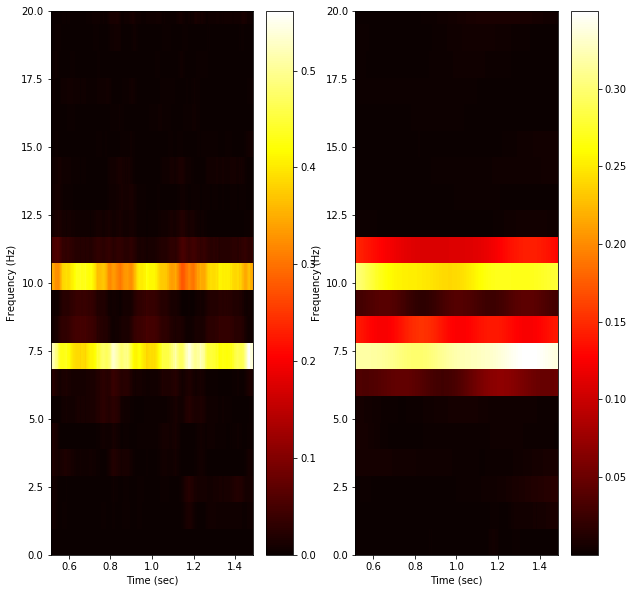

In [5]:
# Power
# defined as the output of the FFT multiplied by its complex conjugate
# also, the abs(FFT^2)
# only amplitude information, no phase info
# complementary plot = phase coherence plot (shows only phase information)

# now, plot some spectrograms
# note: spectrogram output depends heavily on the choice of window width and shape

# THERE'S ALWAYS A TRADE OFF BETWEEN KNOWING WHAT VERSUS WHEN
# i.e. knowing the time the signal occurred versus resolving what frequencies were present
# long time window = more confidence in what
# Short time window = more confidence in when

import scipy.signal as sg
from mpl_toolkits.axes_grid1 import make_axes_locatable

windLength = 1024
wind = np.kaiser(windLength,0)
overl = len(wind)-1
yFreqs = range(21)
fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
f,tt,Sxx =sg.spectrogram(signalAndNoise,fs,wind,len(wind),overl)
plt.pcolormesh(tt,f,Sxx,cmap='hot')
plt.colorbar()
plt.ylabel('Frequency (Hz)');plt.xlabel('Time (sec)')
plt.ylim([0,20])

wind = np.hanning(windLength)
plt.subplot(1,2,2)
f,tt,Sxx =sg.spectrogram(signalAndNoise,fs,wind,len(wind),overl)
plt.pcolormesh(tt,f,Sxx,cmap='hot')
plt.colorbar()
plt.ylabel('Frequency (Hz)');plt.xlabel('Time (sec)')
plt.ylim([0,20])

plt.show()

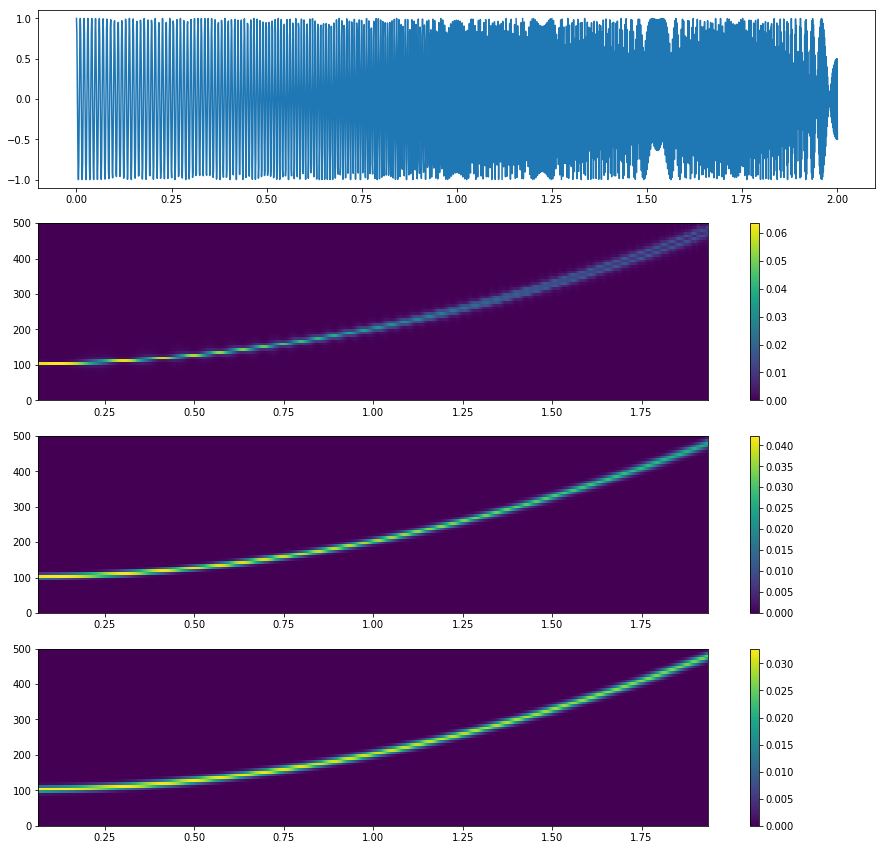

In [9]:
# now look at moving signals

time=np.linspace(0,2,fs*2)
y=sg.chirp(time,100,1,200,'quadratic')
fig=plt.figure(figsize=(15,15))

ax=plt.subplot(4,1,1)
ax.plot(time,y)

ax=plt.subplot(4,1,2)
windLength=128
overl=windLength-1
freqBins=250
wind=np.kaiser(windLength,0)
f,tt,Sxx =sg.spectrogram(y,fs,wind,len(wind),overl)
plt.pcolormesh(tt,f,Sxx)
plt.colorbar()

ax=plt.subplot(4,1,3)
wind=np.hanning(windLength)
f,tt,Sxx =sg.spectrogram(y,fs,wind,len(wind),overl)
plt.pcolormesh(tt,f,Sxx)
plt.colorbar()

ax=plt.subplot(4,1,4)
wind=sg.chebwin(windLength, at=100)
f,tt,Sxx =sg.spectrogram(y,fs,wind,len(wind),overl)
plt.pcolormesh(tt,f,Sxx)
plt.colorbar()

plt.show()

D:\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


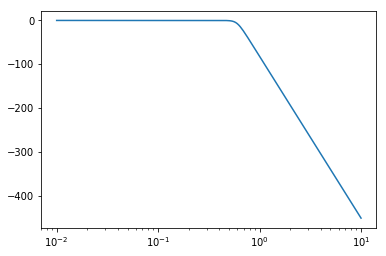

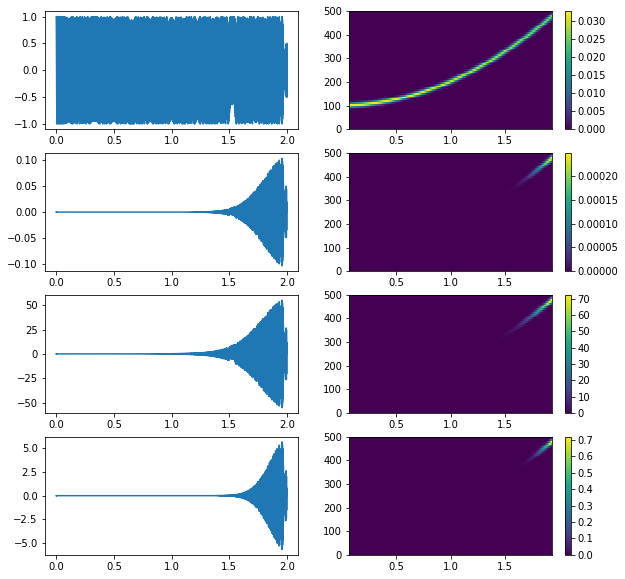

In [43]:
# talking filters, specifically the Butterworth filter
# Butterworth tries to faithfully pass signal in the passband and smoothly falls off outside

# create both Butterworth and Chebichev filters

b1_low,a1_low = sg.butter(5,.2,'low',analog=True)
b2_low,a2_low = sg.butter(10,.2,'low',analog=True)
b3_low,a3_low = sg.cheby1(5,7,.2,'low',analog=True)
b4_low,a4_low = sg.cheby1(10,7,.2,'low',analog=True)

#gotta filter once forward and once backward! (that's what filtfilt does)
B_low,A_low = sg.butter(8,0.6,btype='lowpass',analog=True)
B_high,A_high = sg.butter(8,0.4,btype='highpass',analog=True)
w,k = sg.freqs(B_low,A_low)
plt.semilogx(w,20*np.log(abs(k)))

## FILTFILT IS NOT WORKING PROPERLY -- ONLY DOING HIGH-PASS, NOT LOW-PASS
winds = {}
winds['y'] = y
winds['yLow'] = sg.filtfilt(B_low,A_low,y)
winds['yHigh'] = sg.filtfilt(B_high,A_high,y)
winds['yBand'] = sg.filtfilt(B_low,A_low,winds['yHigh'])

fig=plt.figure(figsize=(10,10))
overl=windLength-1
signals = ['y','yLow','yHigh','yBand']
counter=1
for ii in range(4):
    for jj in range(2):
        ax=plt.subplot(4,2,counter)
        if counter%2 == 1: #if odd
            ax.plot(time,winds[signals[ii]])
            #print('odd'+str(counter))
            counter = counter+1
        else:
            f,tt,Sxx=sg.spectrogram(winds[signals[ii]],fs,wind,windLength,overl)
            plt.pcolormesh(tt,f,Sxx)
            plt.colorbar()
            #print('even'+str(counter))
            counter=counter+1
            
plt.show()
            
